Previous code for bias/variance-tradeoff:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import (
    PolynomialFeatures,
)  # use the fit_transform method of the created object!
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

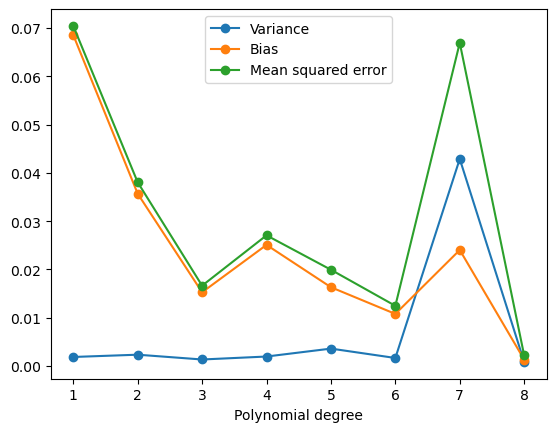

In [4]:
n = 100
bootstraps = 1000

x = np.linspace(-3, 3, n)
y = np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2)) + np.random.normal(0, 0.1)

biases = []
variances = []
mses = []

x = x.reshape(-1, 1)
deg_min = 1
deg_max = 8

for p in range(deg_min, deg_max + 1):
    # Make polynomial features
    poly_features = PolynomialFeatures(degree=p)
    # Define design matrix
    X = poly_features.fit_transform(x)
    # Split into training and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    n_test_points = len(y_test)
    n_train_points = len(y_train)
    # Make array for predictions
    predictions = np.zeros((bootstraps, n_test_points))
    # Define targets
    target = y_test
    
    for b in range(bootstraps):
        # Make bootstrap sample
        X_train_re, y_train_re = resample(X_train, y_train, n_samples=n_train_points)
        # Fit model on the sample data:
        poly_model = LinearRegression(fit_intercept=False).fit(X_train_re, y_train_re)
        # Make predictions on test data: 
        poly_predict = poly_model.predict(X_test)
        # Add predictions to array
        predictions[b, :] = poly_predict
    
    # Calculate bias:
    pred_mean = np.mean(predictions, axis=0)
    biases.append(np.mean((pred_mean - target)**2))
    # Calculate variance:
    var_per_point = np.mean((predictions-pred_mean)**2, axis=0)
    variances.append(np.mean(var_per_point))
    # Calculate MSE:
    mses.append(np.mean((predictions-target)**2))

degrees = np.arange(deg_min, deg_max + 1)
plt.plot(degrees, variances, marker="o", label = "Variance")
plt.plot(degrees, biases, marker="o", label = "Bias")
plt.plot(degrees, mses, marker="o", label = "Mean squared error")
plt.xlabel("Polynomial degree")
plt.legend()
plt.show()